In [1]:
# from agent.nodes.subgraphs.cds_ingestor import llm_with_cds_tools
from agent.nodes.subgraphs.cds_ingestor import cds_temperature
from agent.tools import spi_notebook_creation
from agent import utils
from langchain_core.messages import AIMessage, HumanMessage,SystemMessage
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from agent import utils
from agent.nodes.subgraphs.cds_ingestor import llm_with_cds_tools

In [10]:
x = llm_with_cds_tools.invoke(
    [
        HumanMessage(content='hi what can you do', additional_kwargs={}, response_metadata={}, id='8daf464c-563f-4e1a-81bf-653d0fe20168'),
        AIMessage(content='Hello! I am a MultiAgent AI designed to assist with climate data extraction tasks, particularly for the I-CISK Project. Here’s what I can do:\n\n1. **Standardized Precipitation Index (SPI) Calculation**: I can help create a Jupyter notebook that calculates the SPI index for any geographic region you specify, over a defined period of interest.\n\n2. **Temperature Data**: I can assist you in getting and using temperature data from the Climate Data Store (CDS) by building a Jupyter notebook that utilizes the available APIs.\n\nIf you need help with any of these tasks or have specific requirements, feel free to ask!', additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b376dfbbd5'}, id='run-667d0896-9651-4bba-a821-79a19f0f77eb'), 
        HumanMessage(content='who developed you', additional_kwargs={}, response_metadata={}, id='97737378-c40a-44f1-83e7-1481d748f6d9'),
        SystemMessage(content='the users make this request: "who developed you". Run required tool if needed')
    ]  
)

hasattr(x, 'tool_calls') and len(x.tool_calls) > 0

False

In [16]:
hasattr(x, 'tool_calls') and len(x.tool_calls) > 0

True

In [11]:
invalid_location_message = "no man, i want to restart"

x = utils.ask_llm(
    role = 'system',
    message = f"""When asked to enter a location for CDS_TEMPERATURE tool, the user responded with "which crs?" and it was not possible to obtain a valid bounding box for it. 
    Provide more information to user if he has requested or ask the user to try to specify the location of interest better or if he prefers to exit this tool.
    """,
    llm = llm_with_cds_tools,
    eval_output = False
)
x

'To assist you better with the CDS_TEMPERATURE tool, I need you to specify a location for the temperature data you are interested in. Please provide a bounding box with the following four parameters:\n\n1. Minimum longitude\n2. Minimum latitude\n3. Maximum longitude\n4. Maximum latitude\n\nAlternatively, if you are unsure about the coordinates or how to specify them, you can let me know, and I can help guide you through the process! Would you like to provide the coordinates or prefer to exit this tool?'

In [20]:
import ast
ast.literal_eval('[-9.6, 35.9, 3.0, 43.8]')

[-9.6, 35.9, 3.0, 43.8]

In [23]:
try: 1/0
except Exception as e: print('a')

a


In [22]:
ast.literal_eval('2024-10')

ValueError: malformed node or string on line 1: <ast.BinOp object at 0x000001F0A045CBE0>

In [15]:
import datetime
datetime.datetime.strptime(x, '%Y-%m-%d').date()

datetime.date(2023, 10, 1)

In [ ]:
eval

In [6]:
_base_llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_spi_tools = _base_llm.bind_tools([spi_notebook_creation])

out = llm_with_spi_tools.invoke(
    [HumanMessage(content="possiamo fare un notebook per ottenere lo spi index?")]
)
hasattr(out, "tool_calls") and len(out.tool_calls) > 0

True

In [9]:
@tool()
def cds_temperature2(
    location: str | list = None,
    init_time: str = None,
    lead_time: str = None,
    zarr_output_file: str = None
):
    """
    Create a new Jupyter notebook to allow the user to acquire temperature forecast data from CDS (Climate Data Service).
    Use this tool when user asks for an help with temperature data retrieving even if user does not provide region.
    Returns the name of the notebook file.
    
    Args:
        location: list of four elements representing a bounding box (min_lon, min_lat, max_lon, max_lat)
        init_time: time representing the forecast init month. It should be in the format 'YYYY-MM'. Default is the current month.
        lead_time: time representing the forecast lead month. It should be in the format 'YYYY-MM'. Default is six months ahead from the init_time.
        zarr_output_file: the name of the zarr file to save the data.
    """
    return 'fake-temperature-notebook.ipynb'

# _base_llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_cds_tools = utils._base_llm.bind_tools([cds_temperature])

out = llm_with_cds_tools.invoke(
    [HumanMessage(content="possiamo fare un notebook per ottenere dati di temperatura da cds?")]
)
hasattr(out, "tool_calls") and len(out.tool_calls) > 0

False

In [67]:
import agent

In [68]:
from agent import graph

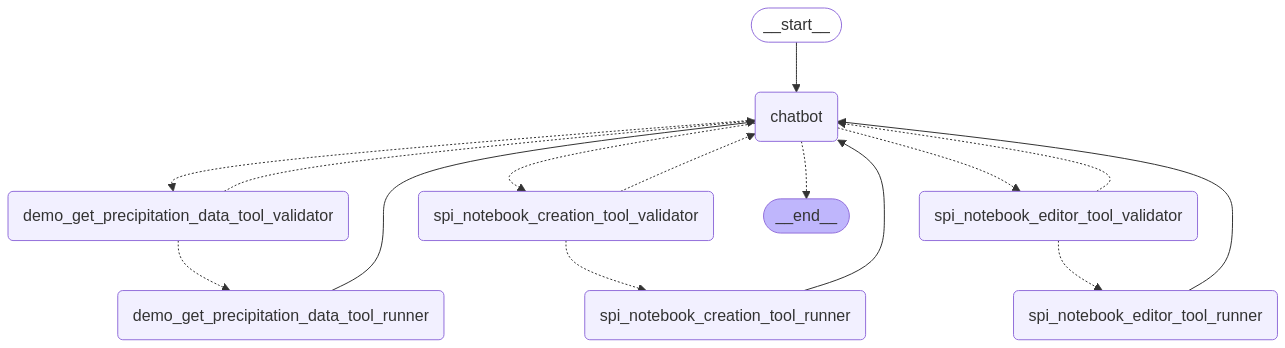

In [69]:
graph

In [185]:
# # Input
# initial_input = {"messages": [{"role": "user", "content": "Mi dai l'intesità di precipitazione?"}] }

# # Thread
# thread = {"configurable": {"thread_id": "4"}}

# # Run the graph until the first interruption
# for event in agent.graph.stream(initial_input, thread, stream_mode="updates"):
#     print('evt: --- ', event)
#     print("\n")

In [186]:
# # Input
# user_input = {"messages": [{"role": "user", "content": "A milano il 15 sett. 2023"}] }

# # Run the graph until the first interruption
# for event in agent.graph.stream(user_input, thread, stream_mode="updates"):
#     print('evt: --- ', event)
#     print("\n")

In [187]:
# from geopy.geocoders import Nominatim

# def get_bounding_box(location_name):
#     geolocator = Nominatim(user_agent="bounding_box_finder")
#     location = geolocator.geocode(location_name, exactly_one=True)

#     if location and hasattr(location, 'raw'):
#         bounding_box = location.raw.get('boundingbox', None)
#         if bounding_box:
#             min_lat, max_lat, min_lon, max_lon = map(float, bounding_box)
#             return [min_lon, min_lat, max_lon, max_lat]
    
#     return None

# get_bounding_box('Georgia, GE')

In [1]:
import json
from agent.utils import _base_llm

In [61]:
out = _base_llm.invoke([
    {
        'role': 'system',
        'content': """L'utente ha fornito questa location: 'che?' . 
        Se rappresenta già una bounding box di 4 coordinate restiuiscimela in formato lista python e nient'altro.
        Se invece rappresenta una location, restituiscimi la bounding box di quella location in formato [min_lon, min_lat, max_lon, max_lat] e nient'altro.
        Altrimenti se non rappresenta nè una bounding box nè una location, restituisci None e nient'altro.
        """
    }
])

In [63]:
eval(out.content) is None

True

In [ ]:
ipynb_json = json.load(open(r'C:\Users\tommaso\AppData\Local\Temp\icisk-chat\spi_[8.4978518, 44.6799091, 11.4276477, 46.6353523]_notebook.ipynb', 'r'))
cells = ipynb_json.get('cells', [])
notebook_source_code = '\n'.join(['\n'.join(cell['source']) for cell in cells])

sys_message = f"""
    Sei un assistente di programmazione che aiuta gli utenti a scrivere codice python.
    Ricorda che il codice è relativo ad un analisi di dati geospaziali, nel caso di richieste relative a mappe, utilizza la libreria folium oppure cartopy.
    Ti è stato chiesto di scrivere del codice python che aggiunga una mappa che visualizzi la media nel tempo dei valori di SPI di ogni cella lat-lon.
    Il codice prodotto deve essere aggiunto a questo codice già esistente.
    
    {notebook_source_code}
    
    Rispondi esclusivamente con righe di codice python che sia integrabile con il codice già esistente. Deve utilizzare le variabili opprtune già definite nel codice.
    Non allegare altro testo.
    Non produrre codice ulteriore rispetto a quello necessario per soddisfare le richieste dichiarate nel parametro code_lines.
"""

code_lines = _base_llm.invoke([{"type": "system", "content": sys_message}])

In [15]:
code_lines

AIMessage(content="```python\nimport folium\nfrom folium import plugins\n\n# Calcola la media nel tempo dei valori di SPI\nmean_spi = spi_dataset.spi.mean(dim='time')\n\n# Crea una mappa centrata sulla regione di interesse\nmappa_spi = folium.Map(location=[(region[1]+region[3])/2, (region[0]+region[2])/2], zoom_start=6)\n\n# Aggiungi i valori di SPI sulla mappa\nfor lat in mean_spi.lat.values:\n    for lon in mean_spi.lon.values:\n        value = mean_spi.sel(lat=lat, lon=lon).values\n        folium.CircleMarker(location=[lat, lon], radius=5,\n                            color='blue' if value >= 0 else 'red',\n                            fill=True, fill_opacity=0.6,\n                            popup=f'SPI: {value:.2f}').add_to(mappa_spi)\n\n# Mostra la mappa\nmappa_spi\n```", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 203, 'prompt_tokens': 2806, 'total_tokens': 3009, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio

In [16]:
for l in code_lines.content.split('\n'):
    print(l)

```python
import folium
from folium import plugins

# Calcola la media nel tempo dei valori di SPI
mean_spi = spi_dataset.spi.mean(dim='time')

# Crea una mappa centrata sulla regione di interesse
mappa_spi = folium.Map(location=[(region[1]+region[3])/2, (region[0]+region[2])/2], zoom_start=6)

# Aggiungi i valori di SPI sulla mappa
for lat in mean_spi.lat.values:
    for lon in mean_spi.lon.values:
        value = mean_spi.sel(lat=lat, lon=lon).values
        folium.CircleMarker(location=[lat, lon], radius=5,
                            color='blue' if value >= 0 else 'red',
                            fill=True, fill_opacity=0.6,
                            popup=f'SPI: {value:.2f}').add_to(mappa_spi)

# Mostra la mappa
mappa_spi
```


In [17]:
import re

def clean_code_block(text):
    """Rimuove eventuali delimitatori di codice markdown (``` e ```python) da un blocco di codice."""
    return re.sub(r"^```(?:python)?\n|\n```$", "", text, flags=re.MULTILINE)

# Esempio di utilizzo
code_block = """```python
import folium
from folium import plugins

# Calcola la media nel tempo dei valori di SPI
mean_spi = spi_dataset.spi.mean(dim='time')

# Crea una mappa centrata sulla regione di interesse
mappa_spi = folium.Map(location=[(region[1]+region[3])/2, (region[0]+region[2])/2], zoom_start=6)

# Aggiungi i valori di SPI sulla mappa
for lat in mean_spi.lat.values:
    for lon in mean_spi.lon.values:
        value = mean_spi.sel(lat=lat, lon=lon).values
        folium.CircleMarker(location=[lat, lon], radius=5,
                            color='blue' if value >= 0 else 'red',
                            fill=True, fill_opacity=0.6,
                            popup=f'SPI: {value:.2f}').add_to(mappa_spi)

# Mostra la mappa
mappa_spi
```"""

cleaned_code = clean_code_block(code_block)
print(cleaned_code)


import folium
from folium import plugins

# Calcola la media nel tempo dei valori di SPI
mean_spi = spi_dataset.spi.mean(dim='time')

# Crea una mappa centrata sulla regione di interesse
mappa_spi = folium.Map(location=[(region[1]+region[3])/2, (region[0]+region[2])/2], zoom_start=6)

# Aggiungi i valori di SPI sulla mappa
for lat in mean_spi.lat.values:
    for lon in mean_spi.lon.values:
        value = mean_spi.sel(lat=lat, lon=lon).values
        folium.CircleMarker(location=[lat, lon], radius=5,
                            color='blue' if value >= 0 else 'red',
                            fill=True, fill_opacity=0.6,
                            popup=f'SPI: {value:.2f}').add_to(mappa_spi)

# Mostra la mappa
mappa_spi


In [233]:
state = {
  "values": {
    "messages": [
      {
        "content": "SPI per la lombardia",
        "additional_kwargs": {},
        "response_metadata": {},
        "type": "human",
        "name": None,
        "id": "2b6e218e-b24a-4bb3-81e7-87b8faeed25c",
        "example": False
      },
      {
        "content": "\n            L'utente a rihiesto di eseguire il tool spi_notebook_creation con  questi argomenti:\n            - region: Lombardia\n            - reference_period: NULL\n            - period_of_interest: NULL\n            Non ha specificato il periodo di riferimento. Chiedigli se vuole usare l'intervallo 1980-2010 di deafult oppure preferisce specificarlo.\n        ",
        "additional_kwargs": {},
        "response_metadata": {},
        "type": "system",
        "name": None,
        "id": "4e1e850c-a399-4642-90d8-098b4b6e2bdc"
      },
      {
        "content": "Per calcolare lo Standardized Precipitation Index (SPI) per la Lombardia, possiamo utilizzare l'intervallo di riferimento predefinito 1981-2010, oppure posso chiedere all'utente di specificare un periodo diverso. Cosa preferisci?",
        "additional_kwargs": {},
        "response_metadata": {
          "finish_reason": "stop",
          "model_name": "gpt-3.5-turbo-0125"
        },
        "type": "ai",
        "name": None,
        "id": "run-416b31ae-fd78-436c-99ab-31feed64dc4d",
        "example": False,
        "tool_calls": [],
        "invalid_tool_calls": [],
        "usage_metadata": None
      },
      {
        "content": "ok quello di default",
        "additional_kwargs": {},
        "response_metadata": {},
        "type": "human",
        "name": None,
        "id": "6c0aae96-aef7-462f-bcf9-78b2a7a1918d",
        "example": False
      },
      {
        "content": "\n            L'utente a rihiesto di eseguire il tool spi_notebook_creation con  questi argomenti:\n            - region: Lombardia\n            - reference_period: [1981, 2010]\n            - period_of_interest: NULL\n            Non ha specificato il periodo di interesse. Chiedigli se vuole usare l'intervallo di default (il mese precedente alla data corrente) oppure preferisce specificarlo.\n        ",
        "additional_kwargs": {},
        "response_metadata": {},
        "type": "system",
        "name": None,
        "id": "353f9bf2-8dae-4332-bda7-69782134d950"
      },
      {
        "content": "Per calcolare lo Standardized Precipitation Index (SPI) per la Lombardia utilizzando l'intervallo di riferimento 1981-2010, possiamo procedere con l'analisi per il periodo di interesse predefinito, che è il mese precedente alla data corrente. Se desideri utilizzare un periodo di interesse diverso, per favore specifica le date di inizio e fine del periodo desiderato.",
        "additional_kwargs": {},
        "response_metadata": {
          "finish_reason": "stop",
          "model_name": "gpt-3.5-turbo-0125"
        },
        "type": "ai",
        "name": None,
        "id": "run-0a90d810-39df-4e21-9872-0735012e749f",
        "example": False,
        "tool_calls": [],
        "invalid_tool_calls": [],
        "usage_metadata": None
      },
      {
        "content": "faciamo il mese scorso",
        "additional_kwargs": {},
        "response_metadata": {},
        "type": "human",
        "name": None,
        "id": "402144fc-696f-4e95-b89f-ab814348f401",
        "example": False
      },
      {
        "content": "\n                    L'utente a rihiesto di eseguire il tool spi_notebook_creation con  questi argomenti:\n                    - region: [8.4978518, 44.6799091, 11.4276477, 46.6353523]\n                    - reference_period: [1981, 2010]\n                    - period_of_interest: ['2023-10', '2023-10']\n                    Per l'argomento region è stata ricavata questa bounding box: [8.4978518, 44.6799091, 11.4276477, 46.6353523]. Chiedi all'utente se è corretta oppure se vuole modificarla.\n                ",
        "additional_kwargs": {},
        "response_metadata": {},
        "type": "system",
        "name": None,
        "id": "d80199e0-16ae-4308-ad2e-905b3fb03479"
      },
      {
        "content": "La bounding box ricavata per la regione della Lombardia è la seguente: [8.4978518, 44.6799091, 11.4276477, 46.6353523]. È corretta o desideri apportare delle modifiche?",
        "additional_kwargs": {},
        "response_metadata": {
          "finish_reason": "stop",
          "model_name": "gpt-3.5-turbo-0125"
        },
        "type": "ai",
        "name": None,
        "id": "run-ca136595-e11d-4efe-91e4-05fc1f0ca286",
        "example": False,
        "tool_calls": [],
        "invalid_tool_calls": [],
        "usage_metadata": None
      },
      {
        "content": "va bene quella!",
        "additional_kwargs": {},
        "response_metadata": {},
        "type": "human",
        "name": None,
        "id": "68b13b58-947c-42b6-9969-2319114338a3",
        "example": False
      }
    #   {
    #     "content": "",
    #     "additional_kwargs": {
    #       "tool_calls": [
    #         {
    #           "index": 0,
    #           "id": "call_1NXmr6nR8PMElNqMO5VSls3Z",
    #           "function": {
    #             "arguments": "{\"region\":[8.4978518,44.6799091,11.4276477,46.6353523],\"reference_period\":[1981,2010],\"period_of_interest\":[\"2023-10\",\"2023-10\"]}",
    #             "name": "spi_notebook_creation"
    #           },
    #           "type": "function"
    #         }
    #       ]
    #     },
    #     "response_metadata": {
    #       "finish_reason": "tool_calls",
    #       "model_name": "gpt-3.5-turbo-0125"
    #     },
    #     "type": "ai",
    #     "name": None,
    #     "id": "run-c777286d-7494-460d-abf2-73701f9bdbc4",
    #     "example": False,
    #     "tool_calls": [
    #       {
    #         "name": "spi_notebook_creation",
    #         "args": {
    #           "region": [
    #             8.4978518,
    #             44.6799091,
    #             11.4276477,
    #             46.6353523
    #           ],
    #           "reference_period": [
    #             1981,
    #             2010
    #           ],
    #           "period_of_interest": [
    #             "2023-10",
    #             "2023-10"
    #           ]
    #         },
    #         "id": "call_1NXmr6nR8PMElNqMO5VSls3Z",
    #         "type": "tool_call"
    #       }
    #     ],
    #     "invalid_tool_calls": [],
    #     "usage_metadata": None
    #   },
    #   {
    #     "content": "C:\\Users\\tommaso\\AppData\\Local\\Temp\\icisk-chat\\spi_[8.4978518, 44.6799091, 11.4276477, 46.6353523]_notebook.ipynb",
    #     "additional_kwargs": {},
    #     "response_metadata": {},
    #     "type": "tool",
    #     "name": "spi_notebook_creation",
    #     "id": "894a84ae-d9b2-4c9b-acb7-444274a7cd12",
    #     "tool_call_id": "call_1NXmr6nR8PMElNqMO5VSls3Z",
    #     "artifact": None,
    #     "status": "success"
    #   },
    #   {
    #     "content": "Ho creato con successo un nuovo notebook Jupyter per calcolare lo Standardized Precipitation Index (SPI) per la Lombardia con l'intervallo di riferimento 1981-2010 e il mese di interesse ottobre 2023. Puoi scaricare il notebook dal seguente percorso:\n\n[saved notebook](C:\\Users\\tommaso\\AppData\\Local\\Temp\\icisk-chat\\spi_[8.4978518, 44.6799091, 11.4276477, 46.6353523]_notebook.ipynb)",
    #     "additional_kwargs": {},
    #     "response_metadata": {
    #       "finish_reason": "stop",
    #       "model_name": "gpt-3.5-turbo-0125"
    #     },
    #     "type": "ai",
    #     "name": None,
    #     "id": "run-65126b67-0c85-467a-bb29-44c7b50d05fe",
    #     "example": False,
    #     "tool_calls": [],
    #     "invalid_tool_calls": [],
    #     "usage_metadata": None
    #   }
    ]
  },
  "next": [],
  "tasks": [],
  "metadata": {
    "x-auth-scheme": "langsmith",
    "langgraph_auth_user": None,
    "langgraph_auth_user_id": "",
    "langgraph_auth_permissions": [],
    "thread_ts": "1f004cb6-802f-683b-800d-5d93bb40fa32",
    "graph_id": "agent",
    "assistant_id": "fe096781-5601-53d2-b2f6-0d3403f7e9ca",
    "user_id": "",
    "created_by": "system",
    "from_studio": True,
    "run_attempt": 1,
    "langgraph_version": "0.3.10",
    "langgraph_plan": "developer",
    "langgraph_host": "self-hosted",
    "thread_id": "41bd84db-92c5-49d8-bcd8-38bde2590c15",
    "checkpoint_id": "1f004cb6-802f-683b-800d-5d93bb40fa32",
    "run_id": "1f004cb7-c394-6ef4-acac-d6d7ad6424b6",
    "source": "loop",
    "writes": {
      "chatbot": {
        "messages": [
          {
            "content": "Ho creato con successo un nuovo notebook Jupyter per calcolare lo Standardized Precipitation Index (SPI) per la Lombardia con l'intervallo di riferimento 1981-2010 e il mese di interesse ottobre 2023. Puoi scaricare il notebook dal seguente percorso:\n\n[saved notebook](C:\\Users\\tommaso\\AppData\\Local\\Temp\\icisk-chat\\spi_[8.4978518, 44.6799091, 11.4276477, 46.6353523]_notebook.ipynb)",
            "additional_kwargs": {},
            "response_metadata": {
              "finish_reason": "stop",
              "model_name": "gpt-3.5-turbo-0125"
            },
            "type": "ai",
            "name": None,
            "id": "run-65126b67-0c85-467a-bb29-44c7b50d05fe",
            "example": False,
            "tool_calls": [],
            "invalid_tool_calls": [],
            "usage_metadata": None
          }
        ]
      }
    },
    "step": 19,
    "parents": {}
  },
  "created_at": "2025-03-19T14:07:29.602452+00:00",
  "checkpoint": {
    "checkpoint_id": "1f004cb7-e855-63ca-8013-1c67426aac11",
    "thread_id": "41bd84db-92c5-49d8-bcd8-38bde2590c15",
    "checkpoint_ns": ""
  },
  "parent_checkpoint": {
    "checkpoint_id": "1f004cb7-d7b0-60d4-8012-6b96367ffd7e",
    "thread_id": "41bd84db-92c5-49d8-bcd8-38bde2590c15",
    "checkpoint_ns": ""
  },
  "checkpoint_id": "1f004cb7-e855-63ca-8013-1c67426aac11",
  "parent_checkpoint_id": "1f004cb7-d7b0-60d4-8012-6b96367ffd7e"
}

msgs = state['values']['messages']

In [ ]:
need_confirm_msg = """
    L'utente a rihiesto di eseguire il tool spi_notebook_creation con questi argomenti:
    - region: [8.4978518,44.6799091,11.4276477,46.6353523]
    - reference_period: [1981,2010]
    - period_of_interest: ["2023-10","2023-10"]
    Non eseguire la chimata. Chiedi all'utente se i parametri sono corretti.
"""

msgs.append({'type': 'system', 'content': need_confirm_msg})

asked_confirm = _base_llm.invoke(msgs)
asked_confirm.content

''

In [ ]:
confirm_msg = """
   No aspetta
"""
msgs.append({'type': 'human', 'content': confirm_msg})

confirm = _base_llm.invoke(msgs)
confirm.content

''

In [222]:
confirm

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_iSnKyTZtoZasHUFUYYprign3', 'function': {'arguments': '{"region":[8.4978518,44.6799091,11.4276477,46.6353523],"reference_period":[1981,2010],"period_of_interest":["2023-10","2023-10"]}', 'name': 'spi_notebook_creation'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 62, 'prompt_tokens': 1102, 'total_tokens': 1164, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-6b11f1e7-74c8-4241-8897-3ab6a9a0a6aa-0', tool_calls=[{'name': 'spi_notebook_creation', 'args': {'region': [8.4978518, 44.6799091, 11.4276477, 46.6353523], 'reference_period': [1981, 2010], 'period_of_interest': ['2023-10', '2023-10']}, 'i